# EXPLORATORY DATA ANALYSIS FOR FEDERAL ENERGY AGANECY

## Data Manipulation And Preprocessing 

### 1. Preparation of Work space

In [252]:
# importing all labraries (Numpyn PAndas, Seaborn and Maplotlib) and packages to prepare workspace
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt

### 2. Accesing Data from the computer data base

In [253]:
Fuel_Data = pd.read_csv('https://raw.githubusercontent.com/ogunsmichael/fuel_fer1/master/fuel_ferc1.csv')
Fuel_Data

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


### 3. Parameter Explanation 

###### 1. record_id : unique id given to identify each record,
###### 2. utility_id_ferc1 : id given by the Federal Energy Regulatory Commission to each utility,
###### 3. report_year : The year the record was given,
###### 4. plant_name_ferc1 : name of the energy plant/station,
###### 5. fuel_type_code_pudl : the type of fuel (i.e coal, gas, nuclear, oil).
###### 6. fuel_unit : the unit of fuel,
###### 7. fuel_qty_burned : the quantity of fuel burned,
###### 8. fuel_mmbtu_per_unit : the measure of energy per unit,
###### 9. fuel_cost_per_unit_burned : the fuel cost per unit burned,
###### 10. fuel_cost_per_unit_delivered : the cost of fuel delivered per unit,
###### 11. fuel_cost_per_mmbtu : the cost of fuel per mmbtu.

## Data Cleaning 

### 1. Check for 'NaN' and wronly spelt variables in each variable colum of the data.

In [254]:
# Majorly, we have 3 column for pure string variable which are plant_name_ferc1, fuel_type_code_pudl,  fuel_unit
# Explicit eplanation hasn't been given for any of the three but a quick look at plant_name_ferc1, we can correct one or two
# This will check for all empty value space, counts them and then display the vlues for each column
Fuel_Data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

###  2. Here we fill the NaN in the fuel_unit with the mcf unit of measurement  and correct the mispelt variable in plant_name_ferc1

In [255]:
# This will fill all empty spaces with 'mcf' a unit of measuring gas
Fuel_Data.groupby( 'fuel_unit' )[ 'fuel_unit' ].count()
Fuel_Data[[ 'fuel_unit' ]] = Fuel_Data[[ 'fuel_unit' ]].fillna(value= 'mcf' )

In [256]:
# We confirm if the coorection had beeen made
Fuel_Data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [257]:
# A quick column view of the plant name column from which a certain plant name was mis spelt as due to omittion of letter 'p' and has been corrected
# This will change the spelling
Fuel_Data['plant_name_ferc1'].replace("resondent's portion","respondent's portion")

0                    rockport
1        rockport total plant
2                      gorgas
3                       barry
4                   chickasaw
                 ...         
29518      neil simpson ct #1
29519    cheyenne prairie 58%
29520       lange ct facility
29521         wygen 3 bhp 52%
29522         wygen 3 bhp 52%
Name: plant_name_ferc1, Length: 29523, dtype: object

In [258]:
# This will chec if the correction had been made, it will return false.
"resondent's portion" in Fuel_Data['plant_name_ferc1']

False

# Data Statistics

###  1. Here we  give a statistical decscription of the Data

In [259]:
# This will give a descriptive statistics of each value column
# Observed that we have removed the following column record_id, utility_id_ferc1, report_year, plant_name_ferc1, fuel_type_code_pudl, fuel_unit
# Because python will automatically remove the column of string because doing the description
# and we remove columns like report_year because we dony=t want python to consider the years of record as value to be described
Fuel_Data.loc[:,['fuel_type_code_pudl' ,'fuel_unit', 'fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']].describe()

,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


### 2. Here we give column view of yearly consumption of fuel

In [260]:
# This will give a quick column view  of the quantity of fuel consumption per year
Fuel_year_qty_relatioship = Fuel_Data.loc[:,['report_year','fuel_qty_burned']]
Fuel_year_qty_relatioship

,report_year,fuel_qty_burned
0,1994,5377489.0
1,1994,10486945.0
2,1994,2978683.0
3,1994,3739484.0
4,1994,40533.0
...,...,...
29518,2018,18799.0
29519,2018,806730.0
29520,2018,104554.0
29521,2018,315945.0


In [261]:
# Descriptive statistics of annuall quantity of fuel burned and cost of fuel burned 
Year_Description = Fuel_Data.groupby('report_year').describe()
Year_Description

utility_id_ferc1                                                   \
                       count        mean        std  min    25%    50%    75%   
report_year                                                                     
1994                  1235.0  106.120648  61.637376  1.0  49.00  115.0  161.0   
1995                  1201.0  110.139051  62.848480  1.0  55.00  121.0  163.0   
1996                  1088.0  108.714154  62.481365  1.0  51.00  120.0  163.0   
1997                  1094.0  108.366545  60.362734  1.0  56.00  119.0  161.0   
1998                  1107.0  109.845528  60.583260  1.0  56.00  120.0  161.0   
1999                  1050.0  108.222857  61.968732  1.0  55.00  119.0  163.0   
2000                  1373.0  111.083758  66.152352  1.0  51.00  120.0  164.0   
2001                  1356.0  113.521386  68.832136  1.0  55.00  119.5  173.0   
2002                  1205.0  120.354357  75.108768  1.0  55.00  122.0  182.0   
2003                  1211.0  123.300578  75.600574  1.0  55.50  127.0  186.0   
2004                  1192.0  121.123322  72.512675  1.0  56.00  127.0  182.0   
2005                  1269.0  121.028369  75.085698  1.0  55.00  127.0  186.0   
2006                  1243.0  117.178600  72.869473  1.0  55.00  121.0  182.0   
2007                  1264.0  116.040348  72.882279  1.0  51.00  120.0  182.0   
2008                  1228.0  120.785016  75.709915  1.0  56.00  127.0  183.0   
2009                  1222.0  118.139116  76.871807  1.0  51.00  121.0  177.0   
2010                  1261.0  117.992863  75.684427  1.0  51.00  121.0  177.0   
2011                  1240.0  121.069355  76.110461  1.0  55.75  127.0  177.0   
2012                  1243.0  120.769912  75.054656  1.0  55.00  127.0  177.0   
2013                  1199.0  122.082569  72.650126  1.0  56.00  127.0  182.0   
2014                  1171.0  129.263877  89.646521  1.0  56.00  132.0  182.0   
2015                  1093.0  128.591949  83.920139  1.0  57.00  134.0  182.0   
2016                  1034.0  133.117021  87.970166  1.0  57.00  134.0  186.0   
2017                   993.0  131.126888  87.791301  1.0  56.00  134.0  182.0   
2018                   951.0  133.669821  88.412742  1.0  57.50  134.0  186.0   

                   fuel_qty_burned                ...  \
               max           count          mean  ...   
report_year                                       ...   
1994         208.0          1235.0  2.724018e+06  ...   
1995         213.0          1201.0  3.712067e+06  ...   
1996         230.0          1088.0  2.544754e+06  ...   
1997         213.0          1094.0  2.813503e+06  ...   
1998         230.0          1107.0  3.267453e+06  ...   
1999         244.0          1050.0  3.281281e+06  ...   
2000         270.0          1373.0  2.472032e+06  ...   
2001         276.0          1356.0  2.321402e+06  ...   
2002         285.0          1205.0  2.145645e+06  ...   
2003         287.0          1211.0  1.888622e+06  ...   
2004         294.0          1192.0  1.782547e+06  ...   
2005         294.0          1269.0  1.768876e+06  ...   
2006         294.0          1243.0  1.957264e+06  ...   
2007         294.0          1264.0  2.035696e+06  ...   
2008         432.0          1228.0  2.046455e+06  ...   
2009         432.0          1222.0  2.154993e+06  ...   
2010         432.0          1261.0  2.423720e+06  ...   
2011         449.0          1240.0  2.461332e+06  ...   
2012         449.0          1243.0  2.747094e+06  ...   
2013         449.0          1199.0  2.741505e+06  ...   
2014         452.0          1171.0  2.700008e+06  ...   
2015         454.0          1093.0  3.340131e+06  ...   
2016         513.0          1034.0  3.693289e+06  ...   
2017         514.0           993.0  3.352850e+06  ...   
2018         514.0           951.0  4.178890e+06  ...   

            fuel_cost_per_unit_delivered              fuel_cost_per_mmbtu  \
                                     75%          max               c

In [262]:
# Column view of the cost of fuel burned per year
Fuel_Cost = Fuel_Data.loc[:,['report_year','fuel_cost_per_unit_burned']]
Fuel_Cost

,report_year,fuel_cost_per_unit_burned
0,1994,18.59
1,1994,18.58
2,1994,39.72
3,1994,47.21
4,1994,2.77
...,...,...
29518,2018,4.78
29519,2018,3.65
29520,2018,4.77
29521,2018,3.06


Text(0.5, 1.0, 'Fuel Consumption Graph')

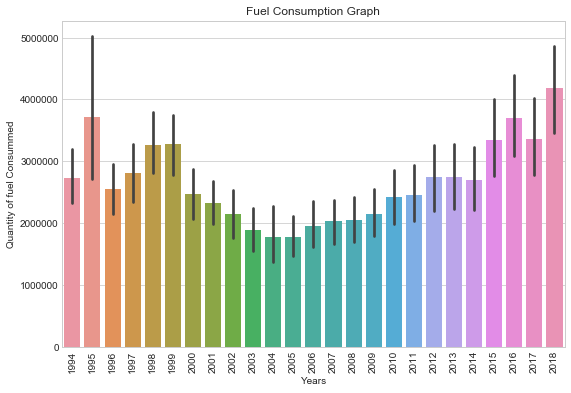

In [263]:
# A bar plot to show fuel consumption per year
# The line on the bars signifies the mean value of each year
plt.figure(figsize=( 9 , 6 ))
plt.xticks(rotation= 90 )
sns.barplot(data=Fuel_year_qty_relatioship , x= 'report_year' , y= 'fuel_qty_burned' )
plt.xlabel( 'Years' )
plt.ylabel('Quantity of fuel Consummed')
plt.title('Fuel Consumption Graph')

Text(0.5, 1.0, 'Fuel Type Quantity Consumption')

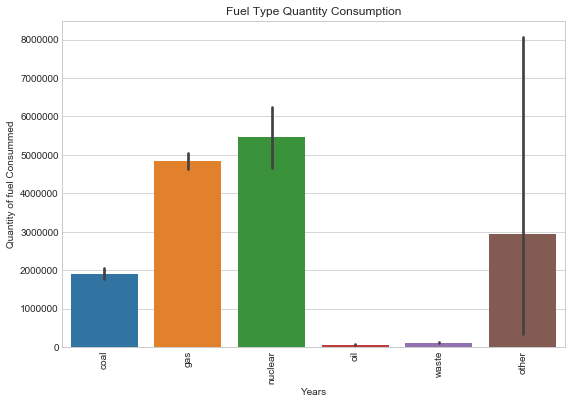

In [264]:
# This show the type of fuel better consumed
# The line on the bars signifies the mean value of each year
plt.figure(figsize=( 9 , 6 ))
plt.xticks(rotation= 90 )
sns.barplot(data=Fuel_Data , x= 'fuel_type_code_pudl' , y= 'fuel_qty_burned' )
plt.xlabel( 'Years' )
plt.ylabel('Quantity of fuel Consummed')
plt.title('Fuel Type Quantity Consumption')

Text(0.5, 1.0, 'Scattered Plot of Fuel Consumption')

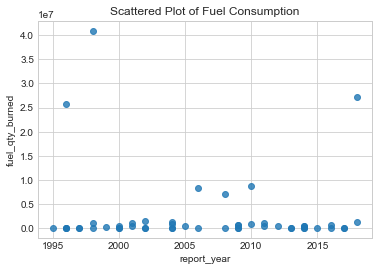

In [265]:
# The scattered plot shows a better representation of annual comsumption 
sample_df = Fuel_year_qty_relatioship.sample(n= 50 , random_state= 6 )
sns.regplot(x=sample_df[ "report_year" ], y=sample_df[ "fuel_qty_burned" ],
fit_reg= False )
plt.title('Scattered Plot of Fuel Consumption')

Text(0.5, 1.0, 'Scattered Plot of Fuel Consumption')

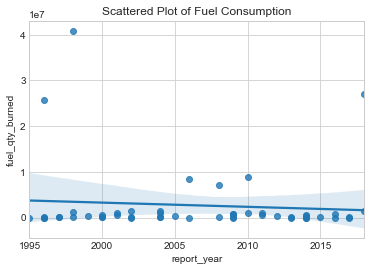

In [266]:
# including regression fit into the scattered plot
sample_df = Fuel_year_qty_relatioship.sample(n= 50 , random_state= 6 )
sns.regplot(x=sample_df[ "report_year" ], y=sample_df[ "fuel_qty_burned" ],
fit_reg= True )
plt.title('Scattered Plot of Fuel Consumption')

Text(0.5, 1.0, 'Annual Cost of Fuel')

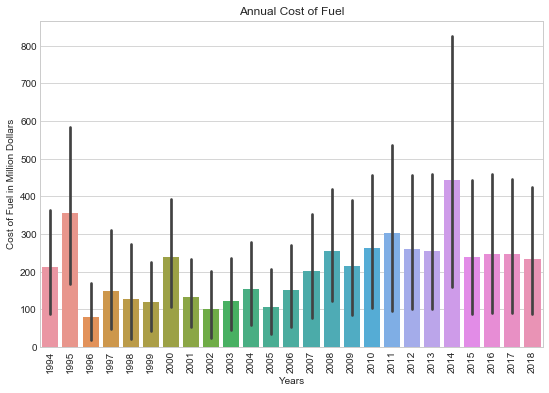

In [267]:
# Cost of Fuel peryear
plt.figure(figsize=( 9 , 6 ))
plt.xticks(rotation= 90 )
sns.barplot(data=Fuel_Data , x= 'report_year' , y= 'fuel_cost_per_unit_burned' )
plt.xlabel( 'Years' )
plt.ylabel('Cost of Fuel in Million Dollars')
plt.title('Annual Cost of Fuel')

Text(0.5, 1.0, 'Fuel Type Annual Consumption ')

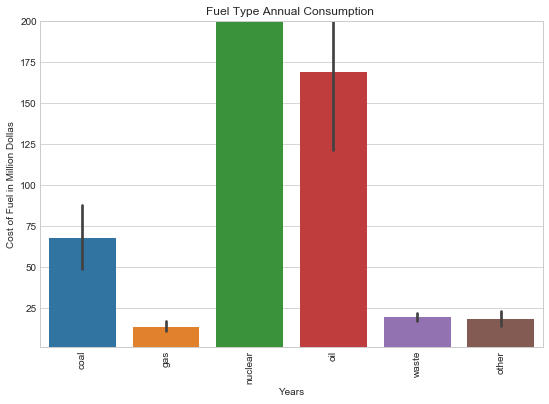

In [268]:
# Barplot view of the Fuel type and their cost with arrow on the bars showing mean
plt.figure(figsize=( 9 , 6 ))
plt.xticks(rotation= 90 )
f = sns.barplot(data=Fuel_Data , x= 'fuel_type_code_pudl' , y= 'fuel_cost_per_unit_burned' )
f.set_ylim( 1, 200)
plt.xlabel( 'Years' )
plt.ylabel('Cost of Fuel in Million Dollas')
plt.title('Fuel Type Annual Consumption ')

Text(0.5, 1.0, 'Scattered Plot of Fuel Cost')

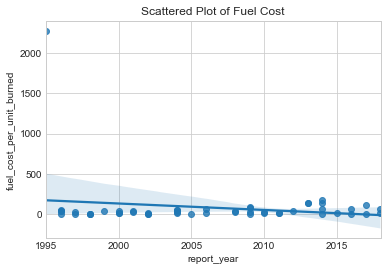

In [269]:
#A Scattered plot with reeression fitting 
sample_df = Fuel_Cost.sample(n= 50 , random_state= 6 )
sns.regplot(x = sample_df[ 'report_year'], y = sample_df['fuel_cost_per_unit_burned'],
fit_reg= True)
plt.title('Scattered Plot of Fuel Cost')

Text(0.5, 1.0, 'Scattered Plot of Fuel Cost')

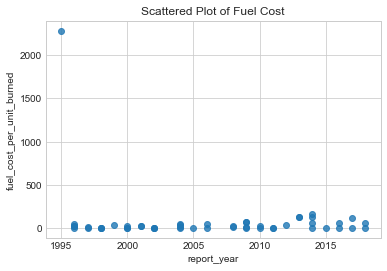

In [270]:
#A Scattered plot without reeression fitting 
sample_df = Fuel_Cost.sample(n= 50 , random_state= 6 )
sns.regplot(x = sample_df[ 'report_year'], y = sample_df['fuel_cost_per_unit_burned'],
fit_reg= False)
plt.title('Scattered Plot of Fuel Cost')

In [271]:
# Slicing through the data
Fuel_Type = Fuel_Data.loc[:,['report_year','fuel_type_code_pudl','fuel_qty_burned','fuel_cost_per_unit_burned', 'fuel_mmbtu_per_unit']]
Fuel_Type

,report_year,fuel_type_code_pudl,fuel_qty_burned,fuel_cost_per_unit_burned,fuel_mmbtu_per_unit
0,1994,coal,5377489.0,18.59,16.590
1,1994,coal,10486945.0,18.58,16.592
2,1994,coal,2978683.0,39.72,24.130
3,1994,coal,3739484.0,47.21,23.950
4,1994,gas,40533.0,2.77,1.000
...,...,...,...,...,...
29518,2018,gas,18799.0,4.78,1.059
29519,2018,gas,806730.0,3.65,1.050
29520,2018,gas,104554.0,4.77,1.060
29521,2018,coal,315945.0,3.06,16.108


Text(0.5, 1.0, 'Box Plot Showing Variation in Choice of Fuel Used')

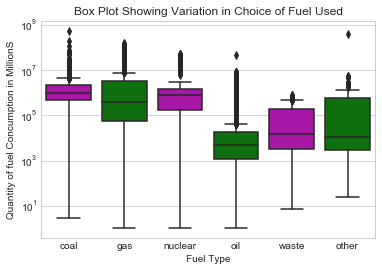

In [272]:
#Box plot
j = sns.boxplot(x = Fuel_Data["fuel_type_code_pudl"], y = Fuel_Data["fuel_qty_burned"], showfliers=True, palette=["m", "g"], data = Fuel_Data)
j.set_yscale('log')
plt.xlabel('Fuel Type')
plt.ylabel('Quantity of fuel Concumption in MillionS')
plt.title('Box Plot Showing Variation in Choice of Fuel Used')

Text(0, 0.5, 'Cost of Fuel')

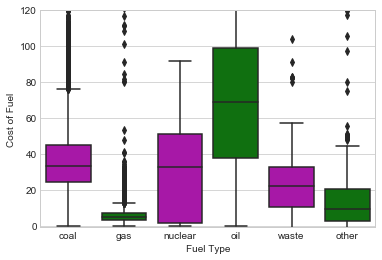

In [273]:
m= sns.boxplot(x = Fuel_Data["fuel_type_code_pudl"], y = Fuel_Data["fuel_cost_per_unit_burned"], showfliers=True, palette=["m", "g"], data = Fuel_Data)
m.set_ylim( -1, 120)
plt.xlabel('Fuel Type')
plt.ylabel('Cost of Fuel')

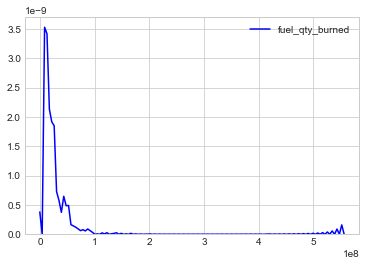

In [274]:
sns.kdeplot(Fuel_Data[ 'fuel_qty_burned'], shade= False, color= "b")

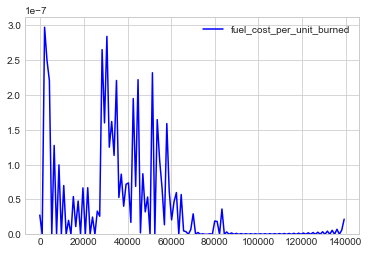

In [275]:
sns.kdeplot(Fuel_Data[ 'fuel_cost_per_unit_burned'], shade= False, color= "b")

In [276]:
Consumption_Cost_Relationship = Fuel_Data.loc[:,['fuel_type_code_pudl','fuel_qty_burned','fuel_cost_per_unit_burned']]
Consumption_Cost_Relationship = Consumption_Cost_Relationship.describe()
Consumption_Cost_Relationship

,fuel_qty_burned,fuel_cost_per_unit_burned
count,2.952300e+04,29523.000000
mean,2.622119e+06,208.649031
std,9.118004e+06,2854.490090
min,1.000000e+00,-276.080000
25%,1.381700e+04,5.207000
50%,2.533220e+05,26.000000
75%,1.424034e+06,47.113000
max,5.558942e+08,139358.000000


In [277]:
Fuel_Cost_Delivred_Burned= Fuel_Data.loc[:,['report_year','fuel_type_code_pudl','fuel_qty_burned','fuel_mmbtu_per_unit','fuel_cost_per_unit_burned','fuel_cost_per_unit_delivered','fuel_cost_per_mmbtu']]
Fuel_Cost_Delivred_Burned

,report_year,fuel_type_code_pudl,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1994,coal,5377489.0,16.590,18.59,18.53,1.121
1,1994,coal,10486945.0,16.592,18.58,18.53,1.120
2,1994,coal,2978683.0,24.130,39.72,38.12,1.650
3,1994,coal,3739484.0,23.950,47.21,45.99,1.970
4,1994,gas,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...
29518,2018,gas,18799.0,1.059,4.78,4.78,9.030
29519,2018,gas,806730.0,1.050,3.65,3.65,6.950
29520,2018,gas,104554.0,1.060,4.77,4.77,8.990
29521,2018,coal,315945.0,16.108,3.06,14.76,1.110


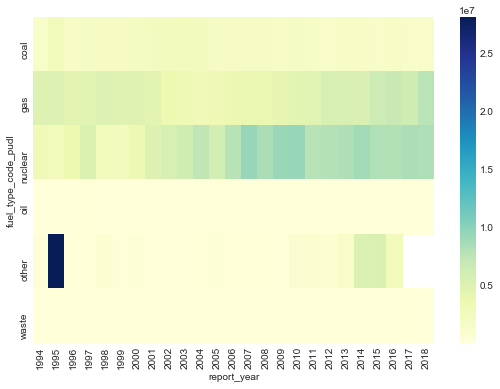

In [278]:
plt.figure(figsize=( 9 , 6 ))
heatmap1_data = pd.pivot_table(Fuel_Cost_Delivred_Burned, values='fuel_qty_burned', index=['fuel_type_code_pudl'], columns='report_year')
sns.heatmap(data = heatmap1_data, cmap='YlGnBu')

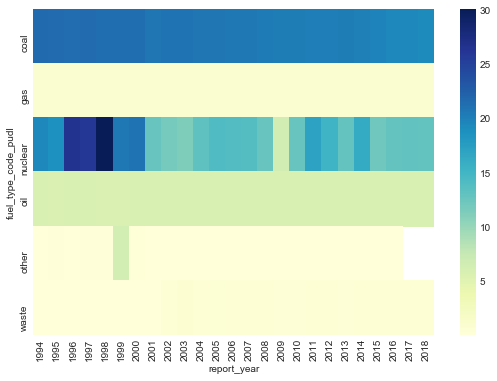

In [279]:
plt.figure(figsize=( 9 , 6 ))
heatmap1_data = pd.pivot_table(Fuel_Cost_Delivred_Burned, values='fuel_mmbtu_per_unit', index=['fuel_type_code_pudl'], columns='report_year')
sns.heatmap(data = heatmap1_data, cmap='YlGnBu')

In [280]:
Kurt_year = heatmap1_data.kurt()
Kurt_year

report_year
1994   -1.847812
1995   -1.748718
1996   -1.470403
1997   -1.560684
1998   -0.795762
1999   -1.857477
2000   -1.956509
2001   -0.026749
2002    0.513646
2003    0.863578
2004   -0.243628
2005   -0.667202
2006   -0.622211
2007   -0.599777
2008   -0.127432
2009    3.320621
2010   -0.168823
2011   -1.704324
2012   -1.224837
2013   -0.229499
2014   -1.532255
2015   -0.103438
2016   -0.520147
2017   -1.364333
2018   -1.419903
dtype: float64

In [281]:
Skew_year = heatmap1_data.skew()
Skew_year

report_year
1994    0.812927
1995    0.831544
1996    0.918842
1997    0.902783
1998    1.055075
1999    0.673862
2000    0.802224
2001    1.092694
2002    1.201723
2003    1.268068
2004    1.060518
2005    0.985249
2006    0.991496
2007    0.994517
2008    1.074538
2009    1.773682
2010    1.066431
2011    0.813777
2012    0.886812
2013    1.055514
2014    0.837052
2015    1.069983
2016    0.991536
2017    0.686367
2018    0.669210
dtype: float64

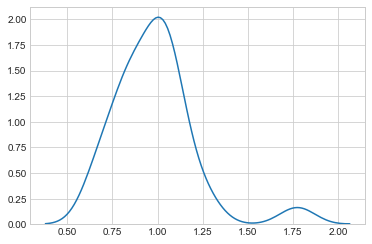

In [282]:
sns.kdeplot(Skew_year)

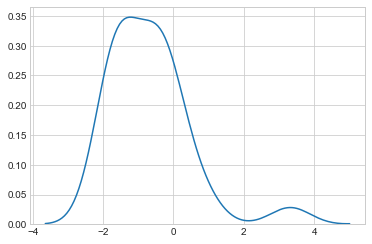

In [283]:
sns.kdeplot(Kurt_year)

In [284]:
Fuel_Type.groupby('report_year').mean()

,fuel_qty_burned,fuel_cost_per_unit_burned,fuel_mmbtu_per_unit
report_year,,,
1994,2.724018e+06,213.191996,10.638098
1995,3.712067e+06,354.422555,10.644830
1996,2.544754e+06,79.434995,10.778041
1997,2.813503e+06,149.482132,10.247632
1998,3.267453e+06,126.683519,10.704964
1999,3.281281e+06,120.053605,10.558885
2000,2.472032e+06,237.797111,9.224475
2001,2.321402e+06,133.013010,8.371469
2002,2.145645e+06,101.179365,8.304833


In [285]:
from scipy.stats import pearsonr

In [286]:
Fuel_Type.groupby('report_year')

In [287]:
Fuel_Cost_Delivred_Burned.loc[:,['fuel_qty_burned','fuel_cost_per_unit_burned']].corr()


,fuel_qty_burned,fuel_cost_per_unit_burned
fuel_qty_burned,1.000000,-0.018535
fuel_cost_per_unit_burned,-0.018535,1.000000


In [288]:
Fuel_Cost_Delivred_Burned.loc[:,['fuel_qty_burned']].corr()

,fuel_qty_burned
fuel_qty_burned,1.0


In [289]:
corr_data = Fuel_Type.groupby('report_year').corr()
corr_data

fuel_qty_burned  \
report_year                                              
1994        fuel_qty_burned                   1.000000   
            fuel_cost_per_unit_burned        -0.024848   
            fuel_mmbtu_per_unit              -0.121230   
1995        fuel_qty_burned                   1.000000   
            fuel_cost_per_unit_burned        -0.015537   
...                                                ...   
2017        fuel_cost_per_unit_burned        -0.026091   
            fuel_mmbtu_per_unit              -0.149623   
2018        fuel_qty_burned                   1.000000   
            fuel_cost_per_unit_burned        -0.029556   
            fuel_mmbtu_per_unit              -0.168804   

                                       fuel_cost_per_unit_burned  \
report_year                                                        
1994        fuel_qty_burned                            -0.024848   
            fuel_cost_per_unit_burned                   1.000000   
            fuel_mmbtu_per_unit                        -0.052890   
1995        fuel_qty_burned                            -0.015537   
            fuel_cost_per_unit_burned                   1.000000   
...                                                          ...   
2017        fuel_cost_per_unit_burned                   1.000000   
            fuel_mmbtu_per_unit                        -0.046004   
2018        fuel_qty_burned                            -0.029556   
            fuel_cost_per_unit_burned                   1.000000   
            fuel_mmbtu_per_unit                        -0.045473   

                                       fuel_mmbtu_per_unit  
report_year                                                 
1994        fuel_qty_burned                      -0.121230  
            fuel_cost_per_unit_burned            -0.052890  
            fuel_mmbtu_per_unit                   1.000000  
1995        fuel_qty_burned                      -0.045039  
            fuel_cost_per_unit_burned            -0.026499  
...                                                    ...  
2017        fuel_cost_per_unit_burned            -0.046004  
            fuel_mmbtu_per_unit                   1.000000  
2018        fuel_qty_burned                      -0.168804  
            fuel_cost_per_unit_burned            -0.045473  
            fuel_mmbtu_per_unit                   1.000000  

[75 rows x 3 columns]

In [290]:
print(second_smallest)

<function second_smallest at 0x0000000016A71F78>


In [291]:
corr_data.iloc[0:,2]

report_year                           
1994         fuel_qty_burned             -0.121230
             fuel_cost_per_unit_burned   -0.052890
             fuel_mmbtu_per_unit          1.000000
1995         fuel_qty_burned             -0.045039
             fuel_cost_per_unit_burned   -0.026499
                                            ...   
2017         fuel_cost_per_unit_burned   -0.046004
             fuel_mmbtu_per_unit          1.000000
2018         fuel_qty_burned             -0.168804
             fuel_cost_per_unit_burned   -0.045473
             fuel_mmbtu_per_unit          1.000000
Name: fuel_mmbtu_per_unit, Length: 75, dtype: float64

In [292]:
min(corr_data.iloc[0:,2])

-0.1688036706556755

In [293]:
Fuel_Type

,report_year,fuel_type_code_pudl,fuel_qty_burned,fuel_cost_per_unit_burned,fuel_mmbtu_per_unit
0,1994,coal,5377489.0,18.59,16.590
1,1994,coal,10486945.0,18.58,16.592
2,1994,coal,2978683.0,39.72,24.130
3,1994,coal,3739484.0,47.21,23.950
4,1994,gas,40533.0,2.77,1.000
...,...,...,...,...,...
29518,2018,gas,18799.0,4.78,1.059
29519,2018,gas,806730.0,3.65,1.050
29520,2018,gas,104554.0,4.77,1.060
29521,2018,coal,315945.0,3.06,16.108
